# Chapter 7.2 Hierarchical Clustering

Another approach to clustering is **hierarchical clustering**. Unlike $k$-means, hierarchical clustering does not require specifying the number of clusters in advance. It will learn an entire _hierarchy_ of models: a 1-cluster model, a 2-cluster model, and so on, up to an $n$-cluster model in which each of the $n$ observations is in its own cluster. In this hierarchy, the $(k+1)$-cluster model is obtained by splitting one of the clusters in the $k$-cluster model in two.

How do we learn a hierarchy of clusters? There are two general approaches:

- **Divisive** ("top-down"): Start with all of the observations in a single cluster. Recursively split clusters into smaller clusters, until every observation is in its own cluster.
- **Agglomerative** ("bottom-up"): Start with each observation in its own cluster. Recursively merge clusters into larger clusters, until every observation is in a single cluster.

In this section, we will focus on _agglomerative_ hierarchical clustering algorithms, which are more commonly used and easier to understand.

# The Algorithm, in Pictures

Suppose we have a dataset consisting of the 5 points shown below.

![](hierarchical0.jpg)

In agglomerative hierarchical clustering, each point starts out in its own cluster, and we successively merge clusters. The first step is clearly to merge A and B into one cluster, since they are the two closest points.

![](hierarchical1.jpg)

We now have 4 clusters: {A, B}, {C}, {D}, {E}. What do we merge next? Here things become somewhat tricky. So far, we have only defined the distance between two _points_. But now we need a way to measure the distance between a _cluster_ and a _point_, and more generally, the distance between two _clusters_. It turns out that there are several ways to extend a distance metric between points to a distance metric between clusters. These different extensions are called **linkages**. The choice of linkage can have a significant influence on the clusters that are obtained. We will return to this point later.

For now, it seems that no matter how you look at it, the "closest" clusters are clearly {C} and {A, B}, so let's merge them.

![](hierarchical2.jpg)

Next, we merge D and E into one cluster.

![](hierarchical3.jpg)

And finally, we merge the two clusters into one large cluster containing all 5 observations.

![](hierarchical4.jpg)

# Dendrograms: A Way to Visualize Hierarchical Clustering

A **dendrogram** (from the Greek word _dendron_, meaning "tree") is a visualization of a hierarchy of clusters. The individual observations are listed at the tips of the branches. Each U-shaped merger of two branches on this diagram corresponds to a merger of two clusters. The height at which the branches merge represents the distance between the clusters before they merged.

![](dendro1.jpg)

Suppose we want two clusters. We would cut the dendrogram at a height where there are exactly two branches remaining. We can see easily from the dendrogram that the resulting clusters are {A, B, C} and {D, E}.

![](dendro2.jpg)

Similarly, if we wanted four clusters, we would cut the dendrogram at a height where there are exactly four branches remaining. We can see from the dendrogram that the resulting clusters would be {A, B}, {C}, {D}, {E}.

![](dendro3.jpg)

## More about Linkages

Let's return to the question of how to measure the distance between two clusters. A distance metric between clusters, which we will denote by $D$, is derived from a distance metric between points, which we will denote by $d$. (The distance metric $d$ might be, for example, Euclidean distance, Manhattan distance, etc.). There are many ways to extend a distance metric for points to a distance metric for clusters. These different extensions are called **linkages**. Some common ones are:

- **single linkage:** the distance between the two _closest_ points in the clusters

$$D(A, B) = \min\{ d(a, b): a \in A, b \in B \}$$

- **complete linkage:** the distance between the two _furthest_ points in the clusters

$$D(A, B) = \max\{ d(a, b): a \in A, b \in B \}$$

- **average linkage:** the average of all pairwise distances between points in the clusters

$$D(A, B) = \frac{1}{|A| |B|} \sum_{a \in A} \sum_{b \in B} d(a, b) $$

These three linkages are illustrated in the diagrams below.

![](linkage1.jpg) ![](linkage2.jpg)

# Hierarchical Clustering in _scikit-learn_ and _scipy_

Although hierarchical clustering is intuitive, it is not straightforward to implement, so we will not pursue that here. Instead, we will use two professional implementations of hierarchical clustering: _scikit-learn_'s and _scipy_'s.

We start with _scikit-learn_ because its API is probably more familiar to you by now. In _scikit-learn_, you have to specify the number of clusters upfront. Let's fit a hierarchical clustering model to the iris data set.

In [1]:
%matplotlib inline
import pandas as pd
iris_df = pd.read_csv("https://raw.githubusercontent.com/dlsun/data-science-book/master/data/iris.csv")
X_train = iris_df[["PetalLength", "PetalWidth"]]

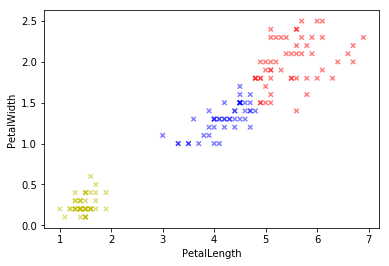

In [2]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3, 
                                affinity="euclidean",
                                linkage="complete")
model.fit(X_train)
clusters = model.labels_

clusters = pd.Series(clusters).map({
    0: "r",
    1: "b",
    2: "y"
})

X_train.plot.scatter(x="PetalLength", y="PetalWidth", 
                     c=clusters, marker="x", alpha=.5)

The disadvantage of _scikit-learn_ is that it does not draw dendrograms. For dendrograms, we turn to `scipy`. The hierarchical clustering API in `scipy` works as follows:

- First, you create a _linkage matrix_ that encodes the clustering.
- Then, you call `fcluster()` on this linkage matrix to get the cluster assignments or `dendrogram()` to get a plot of the dendrogram. (This function also returns a bunch of other output which you probably do not need; you can suppress the output by adding a semicolon to the end of the line.)

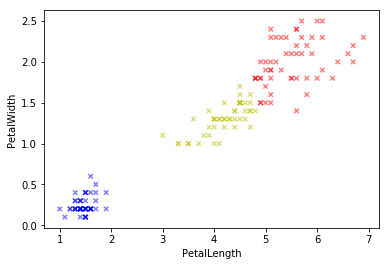

In [3]:
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram

Z = linkage(X_train, method="complete", metric="euclidean")
clusters = fcluster(Z, 3, criterion="maxclust")

clusters = pd.Series(clusters).map({
    1: "r",
    2: "b",
    3: "y"
})

X_train.plot.scatter(x="PetalLength", y="PetalWidth", 
                     c=clusters, marker="x", alpha=.5)

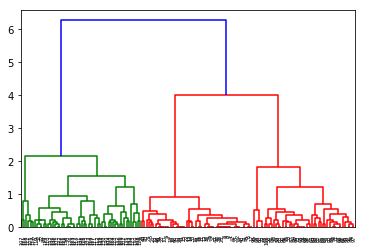

In [4]:
dendrogram(Z);

# Exercises

**Exercise 1.** Fit a hierarchical clustering model to the Titanic passengers dataset (`https://raw.githubusercontent.com/dlsun/data-science-book/master/data/titanic.csv`). You are free to choose which features to include (but include both categorical and quantitative features) and the linkage function. Then, choose a number of clusters that seems appropriate. Look at the profiles of the passengers in each cluster. Can you come up with an "interpretation" of each cluster based on the passengers in it?

In [ ]:
# TYPE YOUR CODE HERE

**Exercise 2.** The code below reads in the "two moons" dataset, a synthetic dataset that is used to evaluate clustering algorithms. What clusters do you think hierarchical clustering will find if you use single linkage? What if you use average linkage? Once you have a hypothesis for each type of linkage, test out your hypothesis by fitting the model to this dataset and plotting the resulting clusters.

In [ ]:
# TYPE YOUR CODE HERE
moons = pd.read_csv("https://raw.githubusercontent.com/dlsun/data-science-book/master/data/two_moons.csv")
moons.plot.scatter(x="x1", y="x2", color="k")

**Exercise 3.** The code below reads in the "satellite" dataset, a synthetic dataset that is used to evaluate clustering algorithms. What clusters do you think hierarchical clustering will find if you use single linkage? What if you use average linkage? Once you have a hypothesis for each type of linkage, test out your hypothesis by fitting the model to this dataset and plotting the resulting clusters.

_Food for thought:_ How do the results here compare to $k$-means?

In [ ]:
# TYPE YOUR CODE HERE
satellite = pd.read_csv("https://raw.githubusercontent.com/dlsun/data-science-book/master/data/satellite.csv")
satellite.plot.scatter(x="x1", y="x2", color="k")